In [14]:
import geopandas as gpd
f=gpd.read_file("data/500-Year_Flood_Plain.geojson").to_crs(epsg=6933)
g=gpd.read_file("data/100-Year_Flood_Plain.geojson").to_crs(epsg=6933)
c=gpd.read_file("data/Los_Angeles_County_CVA_Social_Vulnerability_Index.geojson").to_crs(epsg=6933)
n=gpd.read_file("data/neighborhood.geojson").to_crs(epsg=6933)

<AxesSubplot: >

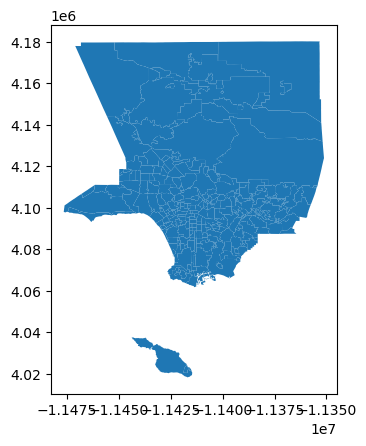

In [16]:
n.plot()

<AxesSubplot: >

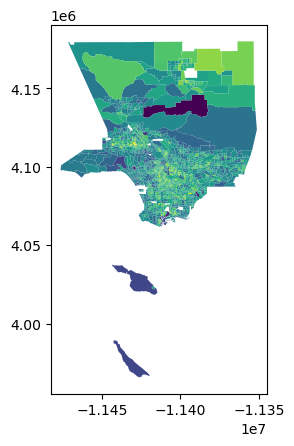

In [13]:
c.plot(column="SoVI_Score")

In [17]:
tracts = []
for i in list(range(0,c.shape[0])):
    tracts.append([c.iloc[i]])

In [18]:
hoods = []
for i in list(range(0,n.shape[0])):
    hoods.append([n.iloc[i]])

In [19]:
def f1(a,b):
    return (a[0]["geometry"].intersection(b[0]["geometry"])).area
def f2(b,aa):
    return sum([f1(a,b)*a[0]["SoVI_Score"] for a in aa])
def f3(aa,bb):
    return [f2(b,aa)/b[0]["geometry"].area for b in bb]

In [20]:
mean_SVI=f3(tracts,hoods)

/opt/conda/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


GEOSException: TopologyException: Input geom 1 is invalid: Nested shells at -11401547.731806958 4074767.0811532349